# pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Loading and Preprocessing

### Load CSV files

In [4]:
column_names = ['Block', 'Trial', 'Response_Level', 'Condition', 'Correct', 'Reaction_Time']  # Define column names
session1_df = pd.read_csv('data/Study3_P1NAVON1.csv', header=None, names=column_names)

### Display the first few rows of each dataset

In [5]:
print("Session 1 data:")
session1_df

Session 1 data:


,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
0,1,1,1,0,1,0.48137
1,1,2,1,2,0,0.46472
2,1,3,1,2,0,0.49802
3,1,4,1,2,1,0.89621
4,1,5,1,2,1,0.66389
...,...,...,...,...,...,...
635,4,156,2,2,1,0.43135
636,4,157,2,0,1,0.34855
637,4,158,2,0,1,0.38181
638,4,159,2,0,0,0.38180


In [6]:
type(session1_df)

pandas.core.frame.DataFrame

### Check data info

In [7]:
session1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Block           640 non-null    int64  
 1   Trial           640 non-null    int64  
 2   Response_Level  640 non-null    int64  
 3   Condition       640 non-null    int64  
 4   Correct         640 non-null    int64  
 5   Reaction_Time   640 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 30.1 KB


## 2. Data Exploration and Visualization

### Summary statistics

In [8]:
session1_df.describe()

,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,2.500000,80.500000,1.500000,1.000000,0.834375,0.489381
std,1.118908,46.223245,0.500391,1.000782,0.372034,0.121092
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.282230
25%,1.750000,40.750000,1.000000,0.000000,1.000000,0.398438
50%,2.500000,80.500000,1.500000,1.000000,1.000000,0.464780
75%,3.250000,120.250000,2.000000,2.000000,1.000000,0.564265
max,4.000000,160.000000,2.000000,2.000000,1.000000,1.012400


### Visualize reaction time distribution

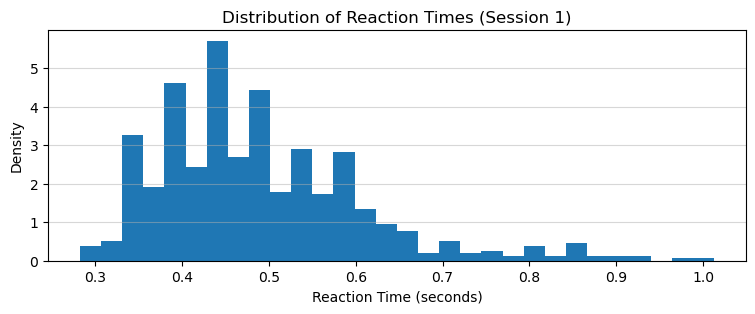

In [9]:
plt.figure(figsize=(9,3))
plt.hist(session1_df['Reaction_Time'], bins=30, density=True)
plt.title('Distribution of Reaction Times (Session 1)')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()

## 3. Data Manipulation and Transformation

### Recode numbers into new categorical columns

In [10]:
session1_df.head()

,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
0,1,1,1,0,1,0.48137
1,1,2,1,2,0,0.46472
2,1,3,1,2,0,0.49802
3,1,4,1,2,1,0.89621
4,1,5,1,2,1,0.66389


In [11]:
# Recode response level
session1_df['Response_Level_Catg'] = session1_df['Response_Level'].map({1: 'Local', 2: 'Global'})

session1_df.head()

,Block,Trial,Response_Level,Condition,Correct,Reaction_Time,Response_Level_Catg
0,1,1,1,0,1,0.48137,Local
1,1,2,1,2,0,0.46472,Local
2,1,3,1,2,0,0.49802,Local
3,1,4,1,2,1,0.89621,Local
4,1,5,1,2,1,0.66389,Local


In [12]:
# Recode condition
session1_df['Condition_Catg'] = session1_df['Condition'].map({0: 'Congruent', 2: 'Incongruent'})
session1_df.head()

,Block,Trial,Response_Level,Condition,Correct,Reaction_Time,Response_Level_Catg,Condition_Catg
0,1,1,1,0,1,0.48137,Local,Congruent
1,1,2,1,2,0,0.46472,Local,Incongruent
2,1,3,1,2,0,0.49802,Local,Incongruent
3,1,4,1,2,1,0.89621,Local,Incongruent
4,1,5,1,2,1,0.66389,Local,Incongruent


### Outliers - remove reaction times > 3 standard deviations

In [13]:
session1_df['Reaction_Time']

0      0.48137
1      0.46472
2      0.49802
3      0.89621
4      0.66389
        ...   
635    0.43135
636    0.34855
637    0.38181
638    0.38180
639    0.43158
Name: Reaction_Time, Length: 640, dtype: float64

In [14]:
# Handle outliers (e.g., remove reaction times > 3 standard deviations)
mean_rt = session1_df['Reaction_Time'].mean()
std_rt = session1_df['Reaction_Time'].std()
print(mean_rt, std_rt)

0.4893810156250006 0.12109206845983286


In [15]:
session1_df['zRT'] = (session1_df['Reaction_Time'] - mean_rt) / std_rt
session1_df.head()

,Block,Trial,Response_Level,Condition,Correct,Reaction_Time,Response_Level_Catg,Condition_Catg,zRT
0,1,1,1,0,1,0.48137,Local,Congruent,-0.066156
1,1,2,1,2,0,0.46472,Local,Incongruent,-0.203655
2,1,3,1,2,0,0.49802,Local,Incongruent,0.071342
3,1,4,1,2,1,0.89621,Local,Incongruent,3.359667
4,1,5,1,2,1,0.66389,Local,Incongruent,1.441126


In [29]:
idx = ((session1_df['zRT'] <= 3) & 
        (session1_df['zRT'] >= -3))
idx

0       True
1       True
2       True
3      False
4       True
       ...  
635     True
636     True
637     True
638     True
639     True
Name: zRT, Length: 640, dtype: bool

In [30]:
session1_df_clean = session1_df[idx]

print("Original dataset size:", len(session1_df))
print("Cleaned dataset size:", len(session1_df_clean))

Original dataset size: 640
Cleaned dataset size: 629


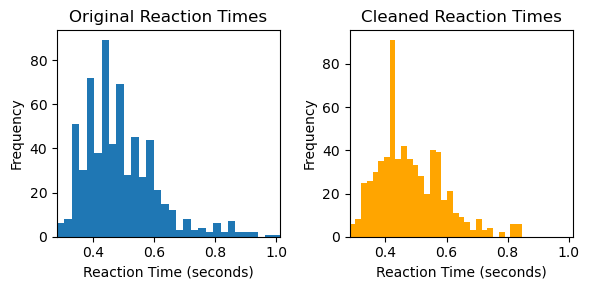

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

# Original response times
plt.subplot(1, 2, 1)
plt.hist(session1_df['Reaction_Time'], bins=30, label='Original')
plt.title('Original Reaction Times')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.xlim(session1_df['Reaction_Time'].min(), session1_df['Reaction_Time'].max())    # <----- Same x-axis

# Cleaned response times
plt.subplot(1, 2, 2)
plt.hist(session1_df_clean['Reaction_Time'], bins=30, label='Cleaned', color='orange')
plt.title('Cleaned Reaction Times')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.xlim(session1_df['Reaction_Time'].min(), session1_df['Reaction_Time'].max())    # <----- Same x-axis

plt.tight_layout()
plt.show()


## 4. Statistical Analysis

### Calculate mean reaction time and accuracy for each condition

In [32]:
# RT
mean_rt_by_condition = session1_df_clean.groupby('Condition_Catg')['Reaction_Time'].mean()
print("Mean Reaction Time by Condition:")
print(mean_rt_by_condition)

# Accuracy
accuracy_by_condition = session1_df_clean.groupby('Condition_Catg')['Correct'].mean()
print("\nAccuracy by Condition:")
print(accuracy_by_condition)

Mean Reaction Time by Condition:
Condition_Catg
Congruent      0.471069
Incongruent    0.493146
Name: Reaction_Time, dtype: float64

Accuracy by Condition:
Condition_Catg
Congruent      0.911392
Incongruent    0.753994
Name: Correct, dtype: float64


In [ ]:
accuracy_by_condition = session1_df_clean.groupby('Condition_Catg')['Correct'].mean()
#     new_df          =     df           .groupby( grouping var   )[target   ].computation

### Calculate mean RT and accuracy for each response level

In [20]:
# RT
mean_rt_by_response = session1_df_clean.groupby('Response_Level_Catg')['Reaction_Time'].mean()
print("Mean Reaction Time by Response level:")
print(mean_rt_by_response)

# Accuracy
accuracy_by_response = session1_df_clean.groupby('Response_Level_Catg')['Correct'].mean()
print("\nAccuracy by Response level:")
print(accuracy_by_response)

Mean Reaction Time by Response level:
Response_Level_Catg
Global    0.425916
Local     0.539823
Name: Reaction_Time, dtype: float64

Accuracy by Response level:
Response_Level_Catg
Global    0.887147
Local     0.777419
Name: Correct, dtype: float64


In [21]:
# Calculate mean reaction time for each condition
mean_rt_by_condition = session1_df_clean.groupby('Condition_Catg')['Reaction_Time'].mean()
print("Mean Reaction Time by Condition:")
print(mean_rt_by_condition)

# Calculate accuracy for each condition
accuracy_by_condition = session1_df_clean.groupby('Condition_Catg')['Correct'].mean()
print("\nAccuracy by Condition:")
print(accuracy_by_condition)

Mean Reaction Time by Condition:
Condition_Catg
Congruent      0.471069
Incongruent    0.493146
Name: Reaction_Time, dtype: float64

Accuracy by Condition:
Condition_Catg
Congruent      0.911392
Incongruent    0.753994
Name: Correct, dtype: float64


### Group by Response level X Condition

In [38]:
mean_rt_by_responseXcondition = session1_df_clean.groupby(['Response_Level_Catg', 'Condition_Catg'])['Reaction_Time'].mean()
print("Mean Reaction Time by Condition:")
mean_rt_by_responseXcondition

Mean Reaction Time by Condition:


Response_Level_Catg  Condition_Catg
Global               Congruent         0.423337
                     Incongruent       0.428480
Local                Congruent         0.519409
                     Incongruent       0.560771
Name: Reaction_Time, dtype: float64

In [36]:
type(mean_rt_by_responseXcondition)

pandas.core.frame.DataFrame

In [33]:
mean_rt_by_responseXcondition.index

MultiIndex([('Global',   'Congruent'),
            ('Global', 'Incongruent'),
            ( 'Local',   'Congruent'),
            ( 'Local', 'Incongruent')],
           names=['Response_Level_Catg', 'Condition_Catg'])

In [42]:
mean_rt_by_responseXcondition.loc['Global']

Condition_Catg
Congruent      0.423337
Incongruent    0.428480
Name: Reaction_Time, dtype: float64

In [43]:
mean_rt_by_responseXcondition.loc[('Global','Congruent')]

0.42333698113207546

In [39]:
mean_rt_by_responseXcondition.reset_index()

,Response_Level_Catg,Condition_Catg,Reaction_Time
0,Global,Congruent,0.423337
1,Global,Incongruent,0.428480
2,Local,Congruent,0.519409
3,Local,Incongruent,0.560771


#### Have both RT and accuracy in the resulting aggregated dataframe

In [23]:
mean_rt_by_responseXcondition = session1_df_clean.groupby(['Response_Level_Catg', 'Condition_Catg'])[['Reaction_Time','Correct']].mean()
print("Mean Reaction Time by Condition:")
mean_rt_by_responseXcondition

Mean Reaction Time by Condition:


Reaction_Time   Correct
Response_Level_Catg Condition_Catg                         
Global              Congruent            0.423337  0.880503
                    Incongruent          0.428480  0.893750
Local               Congruent            0.519409  0.942675
                    Incongruent          0.560771  0.607843

#### Plot the RT per condition with error bars

In [24]:
mean_std_rt_by_responseXcondition = session1_df_clean.groupby(['Response_Level_Catg', 'Condition_Catg'])['Reaction_Time'].agg(['mean', 'std']).reset_index()
mean_std_rt_by_responseXcondition

,Response_Level_Catg,Condition_Catg,mean,std
0,Global,Congruent,0.423337,0.090544
1,Global,Incongruent,0.428480,0.086543
2,Local,Congruent,0.519409,0.083654
3,Local,Incongruent,0.560771,0.103507


In [25]:
mean_std_rt_by_responseXcondition['Response_X_Condition'] = mean_std_rt_by_responseXcondition['Response_Level_Catg'] + ' ' + mean_std_rt_by_responseXcondition['Condition_Catg']
mean_std_rt_by_responseXcondition

,Response_Level_Catg,Condition_Catg,mean,std,Response_X_Condition
0,Global,Congruent,0.423337,0.090544,Global Congruent
1,Global,Incongruent,0.428480,0.086543,Global Incongruent
2,Local,Congruent,0.519409,0.083654,Local Congruent
3,Local,Incongruent,0.560771,0.103507,Local Incongruent


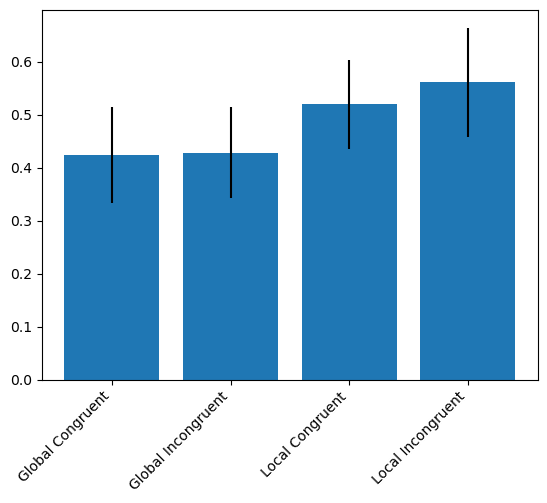

In [26]:
plt.bar(data=mean_std_rt_by_responseXcondition,
             x = 'Response_X_Condition',
             height = 'mean',
             yerr = 'std')
plt.xticks(rotation=45, ha='right')
plt.show()

## 6. Merging Datasets

In [45]:
import pathlib

# Get CSV files list from a folder using pathlib
cwd = pathlib.Path.cwd() # Current working directory
data_dir = cwd / 'data'  # Path object for better file system interaction

for file in data_dir.iterdir():
    print(file.name)

Study3_P10NAVON1.csv
Study3_P10NAVON2.csv
Study3_P12NAVON1.csv
Study3_P12NAVON2.csv
Study3_P13NAVON1.csv
Study3_P13NAVON2.csv
Study3_P14NAVON1.csv
Study3_P14NAVON2.csv
Study3_P15NAVON1.csv
Study3_P15NAVON2.csv
Study3_P16NAVON1.csv
Study3_P16NAVON2.csv
Study3_P17NAVON1.csv
Study3_P17NAVON2.csv
Study3_P18NAVON1.csv
Study3_P18NAVON2.csv
Study3_P19NAVON1.csv
Study3_P19NAVON2.csv
Study3_P1NAVON1.csv
Study3_P1NAVON2.csv
Study3_P20NAVON1.csv
Study3_P20NAVON2.csv
Study3_P21NAVON1.csv
Study3_P21NAVON2.csv
Study3_P22NAVON1.csv
Study3_P22NAVON2.csv
Study3_P23NAVON1.csv
Study3_P23NAVON2.csv
Study3_P24NAVON1.csv
Study3_P24NAVON2.csv
Study3_P25NAVON1.csv
Study3_P25NAVON2.csv
Study3_P26NAVON1.csv
Study3_P26NAVON2.csv
Study3_P27NAVON1.csv
Study3_P27NAVON2.csv
Study3_P28NAVON1.csv
Study3_P28NAVON2.csv
Study3_P29NAVON1.csv
Study3_P29NAVON2.csv
Study3_P2NAVON1.csv
Study3_P2NAVON2.csv
Study3_P30NAVON1.csv
Study3_P30NAVON2.csv
Study3_P31NAVON1.csv
Study3_P31NAVON2.csv
Study3_P32NAVON1.csv
Study3_P32NAVON2.

#### Load together into a dataframe

In [53]:
# Import libraries
import pathlib 
import re  # regular expression

# Get CSV files list
csv_files = list(data_dir.glob('*.csv'))  # List of Path objects for CSV files

# Define column names (assuming all CSVs have same structure)
column_names = ['Block', 'Trial', 'Response_Level', 'Condition', 'Correct', 'Reaction_Time']

# Read each CSV file into DataFrame and add Participant column
df_list = []
for file in csv_files:
    df = pd.read_csv(file, header=None, names=column_names)

    # Extract participant number using regular expression
    match = re.search(r'P(\d+)N', file.name)
    participant_number = int(match.group(1))

    # Add participant number as the first column
    df.insert(0, 'Participant', participant_number) 
    df_list.append(df)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

In [54]:
df

,Participant,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
0,10,1,1,1,0,1,0.33202
1,10,1,2,1,0,1,0.38187
2,10,1,3,1,0,1,0.34871
3,10,1,4,1,0,1,0.36529
4,10,1,5,1,0,1,0.34853
...,...,...,...,...,...,...,...
51195,9,4,156,2,0,1,0.41504
51196,9,4,157,2,2,1,0.34871
51197,9,4,158,2,2,1,0.41512
51198,9,4,159,2,2,1,0.48146


In [55]:
df.describe()

,Participant,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
count,51200.000000,51200.000000,51200.00000,51200.000000,51200.00000,51200.000000,51200.000000
mean,22.225000,2.500000,80.50000,1.500000,1.00000,0.919727,0.484974
std,11.934285,1.118045,46.18757,0.500005,1.00001,0.271719,0.168873
min,1.000000,1.000000,1.00000,1.000000,0.00000,0.000000,0.018324
25%,12.750000,1.750000,40.75000,1.000000,0.00000,1.000000,0.398390
50%,22.500000,2.500000,80.50000,1.500000,1.00000,1.000000,0.450230
75%,32.250000,3.250000,120.25000,2.000000,2.00000,1.000000,0.533520
max,42.000000,4.000000,160.00000,2.000000,2.00000,1.000000,7.832300


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51200 entries, 0 to 51199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant     51200 non-null  object 
 1   Block           51200 non-null  int64  
 2   Trial           51200 non-null  int64  
 3   Response_Level  51200 non-null  int64  
 4   Condition       51200 non-null  int64  
 5   Correct         51200 non-null  int64  
 6   Reaction_Time   51200 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 2.7+ MB


In [59]:
df['Participant'] = df['Participant'].astype('string')
df.head()

,Participant,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
0,10,1,1,1,0,1,0.33202
1,10,1,2,1,0,1,0.38187
2,10,1,3,1,0,1,0.34871
3,10,1,4,1,0,1,0.36529
4,10,1,5,1,0,1,0.34853


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51200 entries, 0 to 51199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant     51200 non-null  string 
 1   Block           51200 non-null  int64  
 2   Trial           51200 non-null  int64  
 3   Response_Level  51200 non-null  int64  
 4   Condition       51200 non-null  int64  
 5   Correct         51200 non-null  int64  
 6   Reaction_Time   51200 non-null  float64
dtypes: float64(1), int64(5), string(1)
memory usage: 2.7 MB


In [62]:
df.describe(include='all')

,Participant,Block,Trial,Response_Level,Condition,Correct,Reaction_Time
count,51200,51200.000000,51200.00000,51200.000000,51200.00000,51200.000000,51200.000000
unique,40,NaN,NaN,NaN,NaN,NaN,NaN
top,10,NaN,NaN,NaN,NaN,NaN,NaN
freq,1280,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.500000,80.50000,1.500000,1.00000,0.919727,0.484974
std,NaN,1.118045,46.18757,0.500005,1.00001,0.271719,0.168873
min,NaN,1.000000,1.00000,1.000000,0.00000,0.000000,0.018324
25%,NaN,1.750000,40.75000,1.000000,0.00000,1.000000,0.398390
50%,NaN,2.500000,80.50000,1.500000,1.00000,1.000000,0.450230
75%,NaN,3.250000,120.25000,2.000000,2.00000,1.000000,0.533520


#### Aggregate to a subject level data set

In [63]:
group_vars = ['Participant', 'Response_Level', 'Condition']
subj_lvl_df = df.groupby(group_vars)['Reaction_Time'].mean().reset_index()
subj_lvl_df

,Participant,Response_Level,Condition,Reaction_Time
0,1,1,0,0.522242
1,1,1,2,0.578465
2,1,2,0,0.495219
3,1,2,2,0.479048
4,10,1,0,0.431609
...,...,...,...,...
155,8,2,2,0.454224
156,9,1,0,0.453686
157,9,1,2,0.505854
158,9,2,0,0.397113


### Exercise

1. What is the mean RT across all participants?

2. Copy and modify the above code to calculate the mean RT *after removing inaccurate responses*.

3. Draw the distribution of per-subject mean RT.

## Hypothesis testing

#### Paired T-test between Condition Levels

A paired samples t-test to compare the mean reaction times between Congruent and Incongruent conditions within participants.

In [81]:
subj_lvl_Condition_df = subj_lvl_df.groupby(['Participant', 'Condition']).mean().reset_index()
subj_lvl_Condition_df.head()

,Participant,Condition,Response_Level,Reaction_Time
0,1,0,1.5,0.508730
1,1,2,1.5,0.528757
2,10,0,1.5,0.410761
3,10,2,1.5,0.440209
4,12,0,1.5,0.418198


In [79]:

# Filter data for Congruent and Incongruent conditions
congruent_rt = subj_lvl_Condition_df[subj_lvl_Condition_df['Condition'] == 0][['Participant', 'Reaction_Time']].set_index('Participant')
incongruent_rt = subj_lvl_Condition_df[subj_lvl_Condition_df['Condition'] == 2][['Participant', 'Reaction_Time']].set_index('Participant')

# Join the dataframes on Participant
paired_rt = congruent_rt.join(incongruent_rt, lsuffix='_Congruent', rsuffix='_Incongruent')
paired_rt.head()

,Reaction_Time_Congruent,Reaction_Time_Incongruent
Participant,,
1,0.508730,0.528757
10,0.410761,0.440209
12,0.418198,0.438786
13,0.488570,0.525495
14,0.503165,0.529868


In [80]:
# Perform paired t-test
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(paired_rt['Reaction_Time_Congruent'], paired_rt['Reaction_Time_Incongruent'])

T-statistic: -20.891420606655952, P-value: 8.77923871341617e-23


In [103]:
# Calculate means and standard deviations
means = paired_rt[['Reaction_Time_Congruent', 'Reaction_Time_Incongruent']].mean()
sems = paired_rt[['Reaction_Time_Congruent', 'Reaction_Time_Incongruent']].sem()

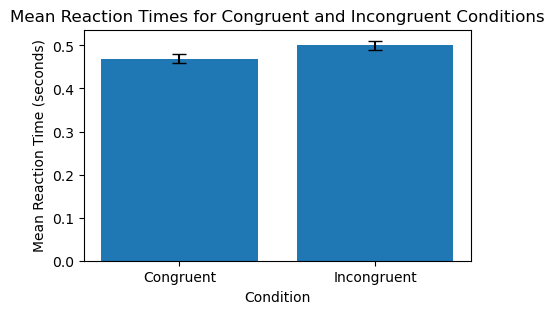

In [104]:
# Plot the means and standard deviations
plt.figure(figsize=(5, 3))
conditions = ['Congruent', 'Incongruent']
plt.bar(conditions, means, yerr=sems, capsize=5)
plt.title('Mean Reaction Times for Congruent and Incongruent Conditions')
plt.xlabel('Condition')
plt.ylabel('Mean Reaction Time (seconds)')
plt.show()

#### ANOVA of Response Level X Condition

We will use a two-way repeated measures ANOVA to examine the interaction effect between Response Level and Condition on Reaction Time within participants.

In [111]:
subj_lvl_df

,Participant,Response_Level,Condition,Reaction_Time
0,1,1,0,0.522242
1,1,1,2,0.578465
2,1,2,0,0.495219
3,1,2,2,0.479048
4,10,1,0,0.431609
...,...,...,...,...
155,8,2,2,0.454224
156,9,1,0,0.453686
157,9,1,2,0.505854
158,9,2,0,0.397113


In [108]:
# Prepare data for repeated measures ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

# Recode 'Participant' as a factor
subj_lvl_df['Participant'] = subj_lvl_df['Participant'].astype('category')

# Fit the model
model = AnovaRM(data=subj_lvl_df,
                depvar='Reaction_Time',
                subject='Participant',
                within=['Response_Level', 'Condition'])
anova_results = model.fit()
print(anova_results.summary())

                         Anova
                         F Value  Num DF  Den DF Pr > F
-------------------------------------------------------
Response_Level           799.2310 1.0000 39.0000 0.0000
Condition                436.4515 1.0000 39.0000 0.0000
Response_Level:Condition 489.3814 1.0000 39.0000 0.0000



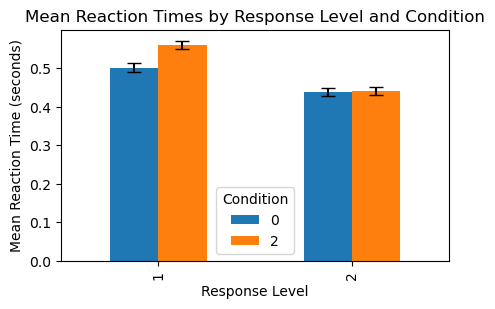

In [110]:
# Calculate means for the interaction plot
interaction_means = subj_lvl_df.groupby(['Response_Level', 'Condition'])['Reaction_Time'].mean().unstack()
interaction_errors = subj_lvl_df.groupby(['Response_Level', 'Condition'])['Reaction_Time'].sem().unstack()

# Plot the interaction means with standard errors
interaction_means.plot(kind='bar', yerr=interaction_errors, figsize=(5, 3), capsize=5)
plt.title('Mean Reaction Times by Response Level and Condition')
plt.xlabel('Response Level')
plt.ylabel('Mean Reaction Time (seconds)')
plt.legend(title='Condition')
plt.show()